In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from qiskit import QuantumCircuit

In [2]:
# load data
np_data = np.load("data/dataRS.npy")

noise_output = np_data[:,-1].reshape(len(np_data),1)
input = np_data[:,:-1]

# split data
test_split = 0.33
x_train, x_test, y_train, y_test = train_test_split(input, noise_output, test_size=test_split)

In [3]:
model = Sequential()
model.add(Dense(1, input_shape=(x_train.shape[1],)))
model.compile(optimizer = Adam(0.005), loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [8]:
reg_history = model.fit(x_train,y_train, epochs=1800, batch_size=25, validation_split=0.2)

Epoch 1/1800
33/33 [==============================] - 0s 11ms/step - loss: 23.2361 - mean_absolute_error: 3.7145 - val_loss: 20.5080 - val_mean_absolute_error: 3.4323
Epoch 2/1800
33/33 [==============================] - 0s 6ms/step - loss: 23.2167 - mean_absolute_error: 3.7093 - val_loss: 20.6246 - val_mean_absolute_error: 3.4427
Epoch 3/1800
33/33 [==============================] - 0s 4ms/step - loss: 23.2084 - mean_absolute_error: 3.7048 - val_loss: 20.6482 - val_mean_absolute_error: 3.4446
Epoch 4/1800
33/33 [==============================] - 0s 4ms/step - loss: 23.2073 - mean_absolute_error: 3.7037 - val_loss: 20.6853 - val_mean_absolute_error: 3.4476
Epoch 5/1800
33/33 [==============================] - 0s 4ms/step - loss: 23.2004 - mean_absolute_error: 3.7022 - val_loss: 20.7555 - val_mean_absolute_error: 3.4539
Epoch 6/1800
33/33 [==============================] - 0s 4ms/step - loss: 23.1960 - mean_absolute_error: 3.7000 - val_loss: 20.7945 - val_mean_absolute_error: 3.4571
Epo

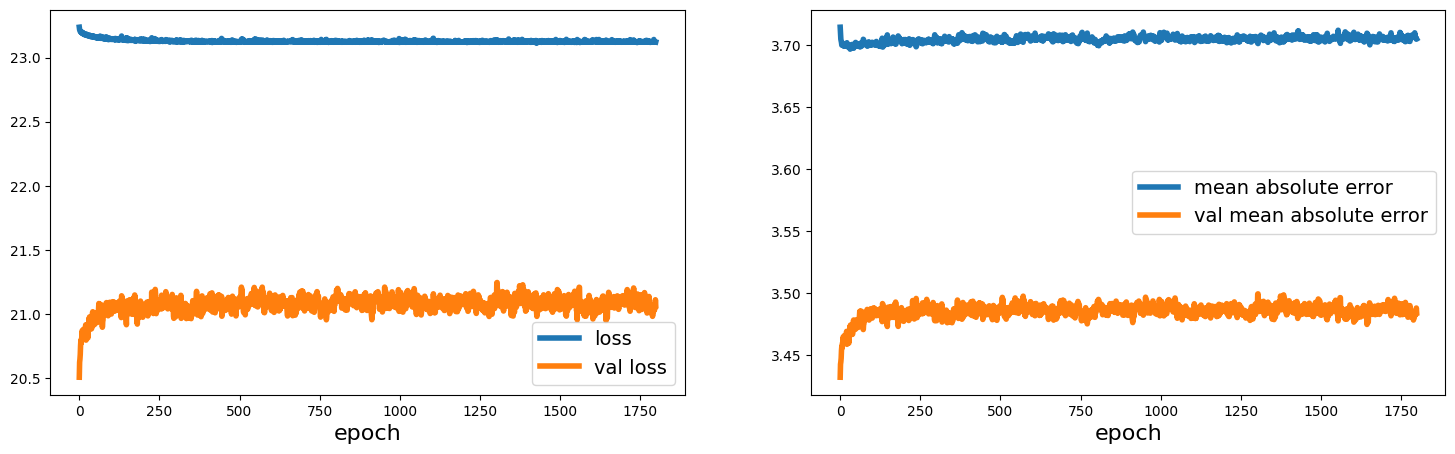

In [9]:
def plot_metrics(history):
    n = len(history.history.keys())//2
    fig,axs = plt.subplots(1,n, figsize=(18,5))

    for i,[key,val] in enumerate(history.history.items()):
        axs[i%n].plot(history.history[key], lw=4, label=key.replace("_", " "))
    
    for ax in axs:
        #ax.set_yscale("log")
        ax.set_xlabel("epoch", fontsize=16)
        ax.legend(fontsize=14)
plot_metrics(model.history)

In [10]:
evaluation = model.evaluate(x_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 23.9774 - mean_absolute_error: 3.8247
